# Predicting Energy Efficiency

In [16]:
%matplotlib inline

import os
import requests
import pandas as pd 
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [17]:
ENERGY = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'

In [18]:
def download_data(url, path='data'):
    if not os.path.exists(path):
        os.mkdir(path)

    response = requests.get(url)
    name = os.path.basename(url)
    with open(os.path.join(path, name), 'wb') as f:
        f.write(response.content)

In [19]:
download_data(ENERGY)

In [20]:
energy = pd.read_excel('data/ENB2012_data.xlsx')

In [21]:
energy.shape

(768, 10)

In [22]:
energy.columns = ['compactness','surface_area','wall_area','roof_area','height',
                  'orientation','glazing_area','distribution','heating_load','cooling_load']

In [23]:
energy.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [24]:
energy.describe()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Are the features predictive?

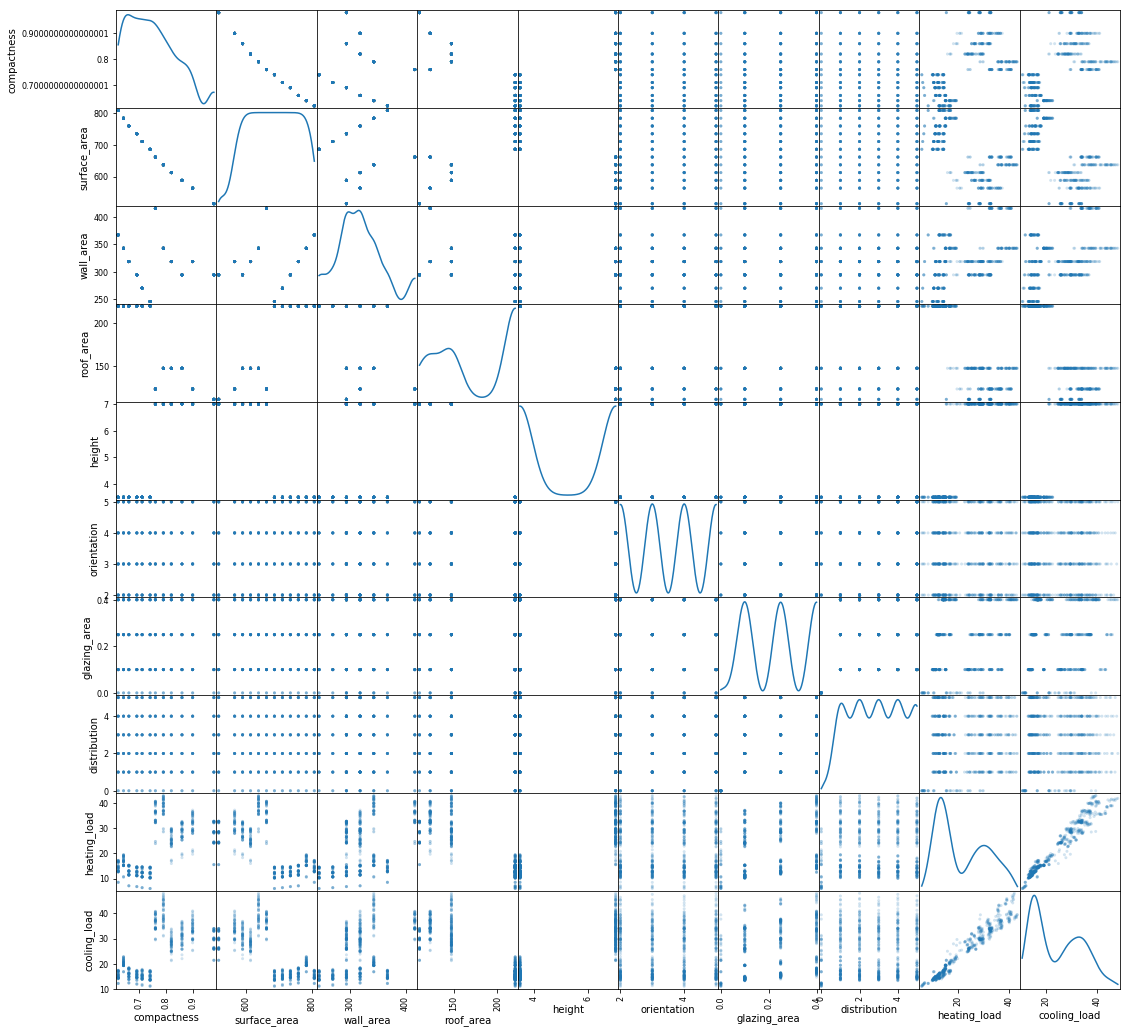

In [25]:
scatter_matrix(energy, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

## Let's focus on predicting heating load

In [26]:
energy_features = energy.iloc[:,0:8]
heat_labels = energy.iloc[:,8]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(energy_features, heat_labels, test_size=0.2)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print('Linear Regression model')
print('Mean Squared Error: %0.3f' % mse(expected, predicted))
print('Coefficient of Determination: %0.3f' % r2_score(expected, predicted))

Linear Regression model
Mean Squared Error: 8.302
Coefficient of Determination: 0.922


In [29]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print('Ridge model')
print('Mean Squared Error: %0.3f' % mse(expected, predicted))
print('Coefficient of Determination: %0.3f' % r2_score(expected, predicted))

Ridge model
Mean Squared Error: 8.367
Coefficient of Determination: 0.921


In [30]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print('Random Forest model')
print('Mean squared error = %0.3f' % mse(expected, predicted))
print('R2 score = %0.3f' % r2_score(expected, predicted))

Random Forest model
Mean squared error = 0.224
R2 score = 0.998


/Users/franco/anaconda3/envs/TestTA/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Which one did best?**<br />
**Which model should we try next?**

### Ready for a bigger challenge? Try this one!

Build a command line application to compute the energy efficiency of a house:      
https://github.com/georgetown-analytics/machine-learning/blob/master/code/energy.py